In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time # dthis for pause cuz api has limits 
from scipy import stats
from scipy.stats import linregress
import pandas as pd
from datetime import datetime
from api_keys import weather_api_key
output_data_file = "output_data/cities.csv"

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from citipy import citipy

In [4]:
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

632
['new norfolk', 'bluff', 'ambanja', 'dolores', 'itarema', 'avarua', 'esperance', 'dikson', 'vaini', 'ushuaia', 'olga', 'fortuna', 'sao filipe', 'swift current', 'sal rei', 'bethel', 'qaanaaq', 'wanning', 'north battleford', 'tierralta', 'caravelas', 'atuona', 'unai', 'wladyslawowo', 'tyup', 'bac lieu', 'cape town', 'margate', 'mataura', 'komsomolskiy', 'puerto ayora', 'vallenar', 'arraial do cabo', 'hermanus', 'urucara', 'aklavik', 'barentsburg', 'lebu', 'jamestown', 'hobart', 'havelock', 'klaksvik', 'maniitsoq', 'tucuman', 'bredasdorp', 'oussouye', 'isangel', 'alugan', 'kununurra', 'cherskiy', 'igarka', 'clyde river', 'villarrica', 'dwarka', 'castro', 'busselton', 'ozgon', 'pueblo', 'balurghat', 'san patricio', 'rikitea', 'port alfred', 'kruisfontein', 'butaritari', 'general roca', 'puerto morazan', 'kaitangata', 'thompson', 'kachikau', 'yellowknife', 'necochea', 'tuktoyaktuk', 'roald', 'nizhneyansk', 'ancud', 'puerto cabezas', 'tawkar', 'la paz', 'san ramon', 'kadykchan', 'warqla

In [5]:
city = "Paris"

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [7]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=983d8abd47f82d04e8c141735444cbdc&units=imperial&q='

In [8]:
# city = cities[0]
# city
city = "Paris"

In [9]:
# open weather api has restricition, so there is i need to make minite pause. 

In [10]:
response = requests.get(query_url+city).json()
response['name']

'Paris'

In [11]:
response['coord']['lon']

2.3488

In [12]:
response['coord']['lat']

48.8534

In [13]:
response['main']

{'temp': 60.89,
 'feels_like': 61,
 'temp_min': 56.28,
 'temp_max': 63.77,
 'pressure': 1010,
 'humidity': 92}

In [14]:
response['main']['temp_max']

63.77

In [15]:
response['main']['humidity']

92

In [16]:
response['clouds']['all']

75

In [17]:
response["wind"]["speed"]

2.3

In [18]:
response["sys"]

{'type': 2,
 'id': 2012208,
 'country': 'FR',
 'sunrise': 1624333633,
 'sunset': 1624391876}

In [19]:
response["sys"]['country']

'FR'

In [20]:
response['dt']

1624340712

In [21]:
# Once figure out then do it
# do for 3 cities so that Gretel does not exist so that we can srite exception
# cities = ["London", "Paris", "Boston","Chicago"]
# do not run all 600 hundred cities. 
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
unfound_cities =[]
unfound_counter = 0
country =[]
date=[]
cities = ["London", "Paris", "Gretel","Chicago", "NK", "Boston", "Buenos Aires", "Cairo", "Algiers", "Sydney","Melbourne", "Queenstown","broome"]
#time.sleep(1)
print("Beginning Data retrieval")
print("----------------------")
counter=1
new_cities = []
for  city in cities:
    print(f"Processing Record {counter} of set {counter}| {city} .")
    counter= counter+1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response["wind"]["speed"])
        new_cities.append(city)
        date.append(response['dt'])
        country.append(response["sys"]['country'])
       
    except KeyError: 
        print("City is not found. Skipping... ")
        unfound_cities.append(city)
        unfound_counter=unfound_counter+1
        print(f"Number of cities unfound: {unfound_counter} | {city}.")
        
print("----------------------")
print("Ending Data retrieval")    

Beginning Data retrieval
----------------------
Processing Record 1 of set 1| London .
Processing Record 2 of set 2| Paris .
Processing Record 3 of set 3| Gretel .
City is not found. Skipping... 
Number of cities unfound: 1 | Gretel.
Processing Record 4 of set 4| Chicago .
Processing Record 5 of set 5| NK .
City is not found. Skipping... 
Number of cities unfound: 2 | NK.
Processing Record 6 of set 6| Boston .
Processing Record 7 of set 7| Buenos Aires .
Processing Record 8 of set 8| Cairo .
Processing Record 9 of set 9| Algiers .
Processing Record 10 of set 10| Sydney .
Processing Record 11 of set 11| Melbourne .
Processing Record 12 of set 12| Queenstown .
Processing Record 13 of set 13| broome .
----------------------
Ending Data retrieval


In [22]:
print(f"Found Cities : {new_cities}.")
print(f"latitudes: {lat}.")
print(f"longitude: {lng}.")
print(f"Max Temp: {max_temp}.")
print(f"Humidity: {humidity}. ")
print(f"Cloudiness:{cloudiness}.")
print(f"Wind Speed: {wind_speed}.")
print(f"Country: {country}.")
print(f"Date: {date}.")
print(f"Unfound_cities {unfound_cities} .")

Found Cities : ['London', 'Paris', 'Chicago', 'Boston', 'Buenos Aires', 'Cairo', 'Algiers', 'Sydney', 'Melbourne', 'Queenstown', 'broome'].
latitudes: [51.5085, 48.8534, 41.85, 42.3584, -34.6132, 30.0626, 36.7525, -33.8679, 28.0836, -31.8976, 42.2506].
longitude: [-0.1257, 2.3488, -87.65, -71.0598, -58.3772, 31.2497, 3.042, 151.2073, -80.6081, 26.8753, -75.833].
Max Temp: [54.27, 63.77, 59.02, 76.37, 53.96, 83.16, 60.62, 62.31, 76.01, 48.16, 69.01].
Humidity: [82, 92, 73, 86, 91, 30, 77, 81, 93, 53, 92]. 
Cloudiness:[20, 75, 52, 40, 90, 0, 0, 40, 1, 6, 90].
Wind Speed: [3, 2.3, 1.01, 3, 4.61, 3.44, 2.3, 1.01, 0, 5.75, 14.97].
Country: ['GB', 'FR', 'US', 'US', 'AR', 'EG', 'DZ', 'AU', 'US', 'ZA', 'US'].
Date: [1624340918, 1624340712, 1624340498, 1624340418, 1624341004, 1624340819, 1624341004, 1624340988, 1624340550, 1624341005, 1624341005].
Unfound_cities ['Gretel', 'NK'] .


In [23]:
weather_df = pd.DataFrame({"City":new_cities,
               "Lat": lat ,
               "Lng": lng, 
               "Max Temp": max_temp,
               "Humidity":humidity,
                "Cloudiness":cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date   
               })

In [24]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.5085,-0.1257,54.27,82,20,3.00,GB,1624340918
1,Paris,48.8534,2.3488,63.77,92,75,2.30,FR,1624340712
2,Chicago,41.8500,-87.6500,59.02,73,52,1.01,US,1624340498
3,Boston,42.3584,-71.0598,76.37,86,40,3.00,US,1624340418
4,Buenos Aires,-34.6132,-58.3772,53.96,91,90,4.61,AR,1624341004
5,Cairo,30.0626,31.2497,83.16,30,0,3.44,EG,1624340819
6,Algiers,36.7525,3.0420,60.62,77,0,2.30,DZ,1624341004
7,Sydney,-33.8679,151.2073,62.31,81,40,1.01,AU,1624340988
8,Melbourne,28.0836,-80.6081,76.01,93,1,0.00,US,1624340550
9,Queenstown,-31.8976,26.8753,48.16,53,6,5.75,ZA,1624341005


In [25]:
weather_df.to_csv("output_data/cities.csv",encoding='utf-8', index=False)

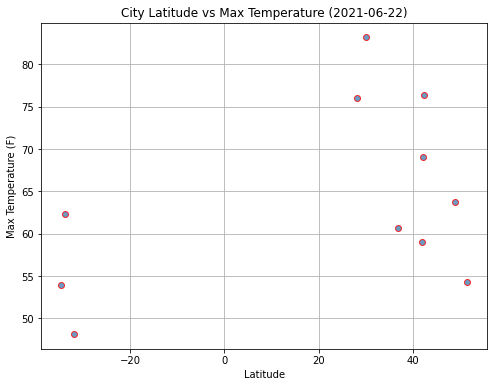

In [26]:
plt.figure(figsize=(8,6))
#sns.set()
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color='steelblue',edgecolor = "red", alpha=0.8)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

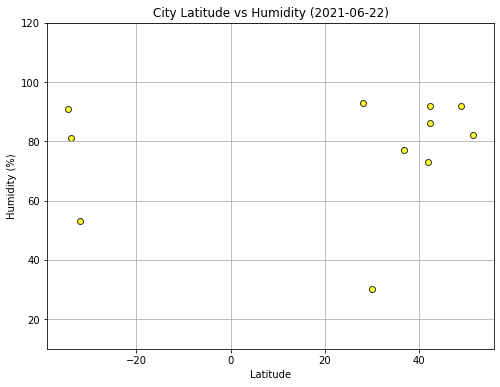

In [27]:
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.figure(figsize=(8,6))
#sns.set()
plt.scatter(x_values, y_values, color='yellow', edgecolor = "black", alpha=0.8)
plt.grid()
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()


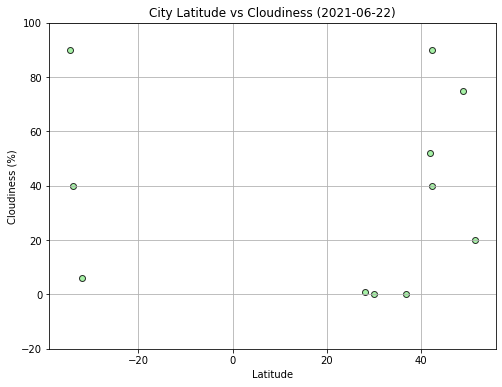

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='lightgreen', edgecolor = "black", alpha=0.8)
plt.grid()
plt.ylim(-20,(weather_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

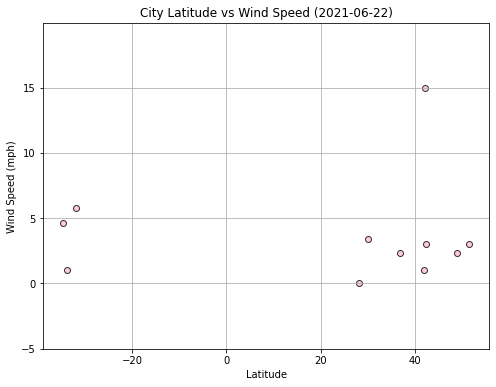

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color='pink', edgecolor = "black",alpha=0.8)
plt.grid()
plt.ylim((weather_df["Wind Speed"].min()-5),(weather_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()

In [32]:
northern = weather_df.loc[weather_df["Lat"] >= 0.0]
northern.reset_index(inplace=True)
southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [33]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

The r-squared is: -0.710443455581382


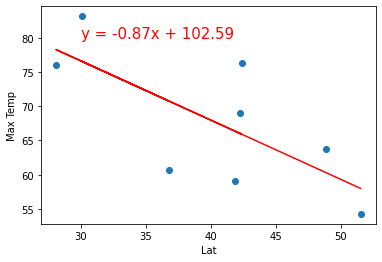

In [77]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (30,80)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

The r-squared is: -0.6246690191356293


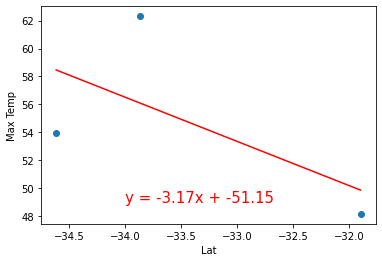

In [74]:

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-34,49)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

The r-squared is: 0.42695984276370297


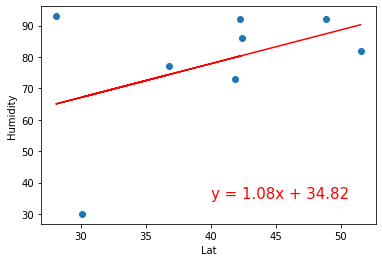

In [52]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (40,35)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

The r-squared is: -0.9999259117084157


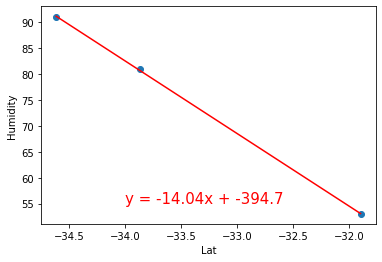

In [73]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-34,55)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

The r-squared is: 0.5950933722352675


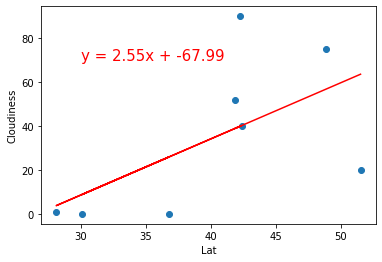

In [62]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (30,70)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,9)

The r-squared is: -0.9343689037572834


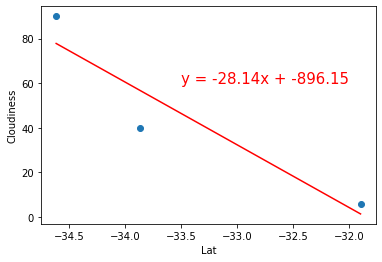

In [72]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-33.5,60)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

The r-squared is: 0.1832218697856505


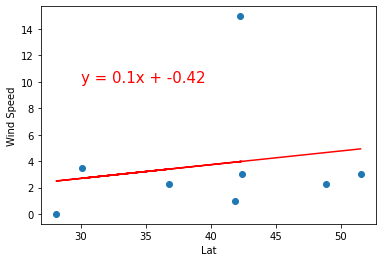

In [83]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (30,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,11)

The r-squared is: 0.4682028768200944


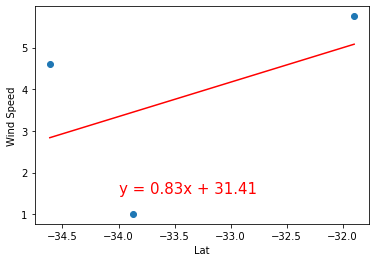

In [91]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-34,1.5)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)

##  Observations